<a href="https://colab.research.google.com/github/jingxuchen19/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Class%202/%20Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install fredapi

In [27]:
import pandas as pd
from fredapi import Fred

In [28]:
fred = Fred(api_key='ca5188a28784f41d2babf47d068e380b')

In [29]:
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

df = df.dropna()

print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [30]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """

    cpi_today = cpi_col.iloc[-1]

    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


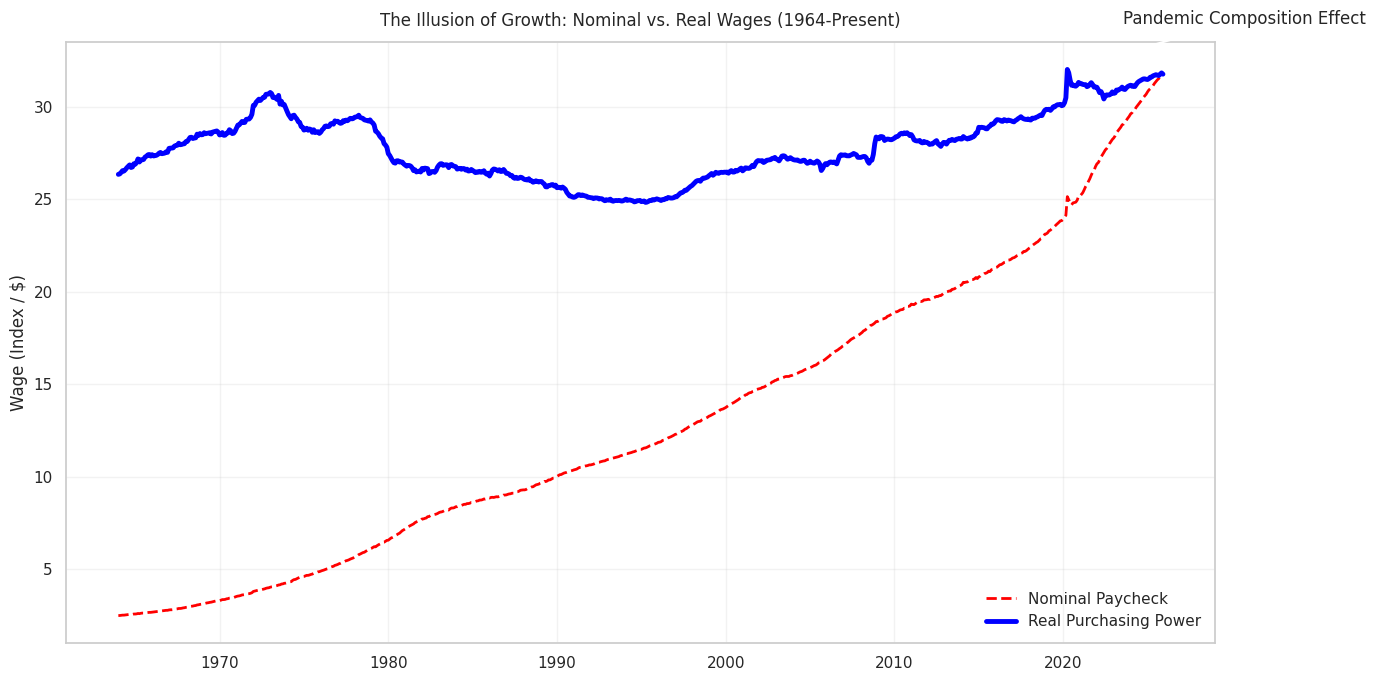

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Styling ---
sns.set_theme(style="whitegrid")

# --- Ensure datetime index (just in case) ---
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=(14, 7))

# 1-3. Plot both lines with required styles/labels
ax.plot(df.index, df["Nominal_Wage"],
        linestyle="--", linewidth=2,
        color="red", label="Nominal Paycheck")

ax.plot(df.index, df["Real_Wage"],
        linestyle="-", linewidth=3.5,
        color="blue", label="Real Purchasing Power")

# 4. Title
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", pad=12)

# Axis labels (optional but nice)
ax.set_xlabel("")
ax.set_ylabel("Wage (Index / $)")

# --- 5. Annotate the 2020 spike in Real Wages ---
# Find the peak Real_Wage within year 2020 (works even if data is monthly/weekly)
df_2020 = df.loc["2020-01-01":"2020-12-31"]

if len(df_2020) > 0:
    spike_date = df_2020["Real_Wage"].idxmax()
    spike_value = df_2020.loc[spike_date, "Real_Wage"]

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(40, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        ha="left",
        va="bottom"
    )
else:
    print("No data found for 2020 in df; annotation skipped.")

# Legend + cosmetics
ax.legend(frameon=False)
ax.grid(True, alpha=0.25)
fig.tight_layout()

plt.show()

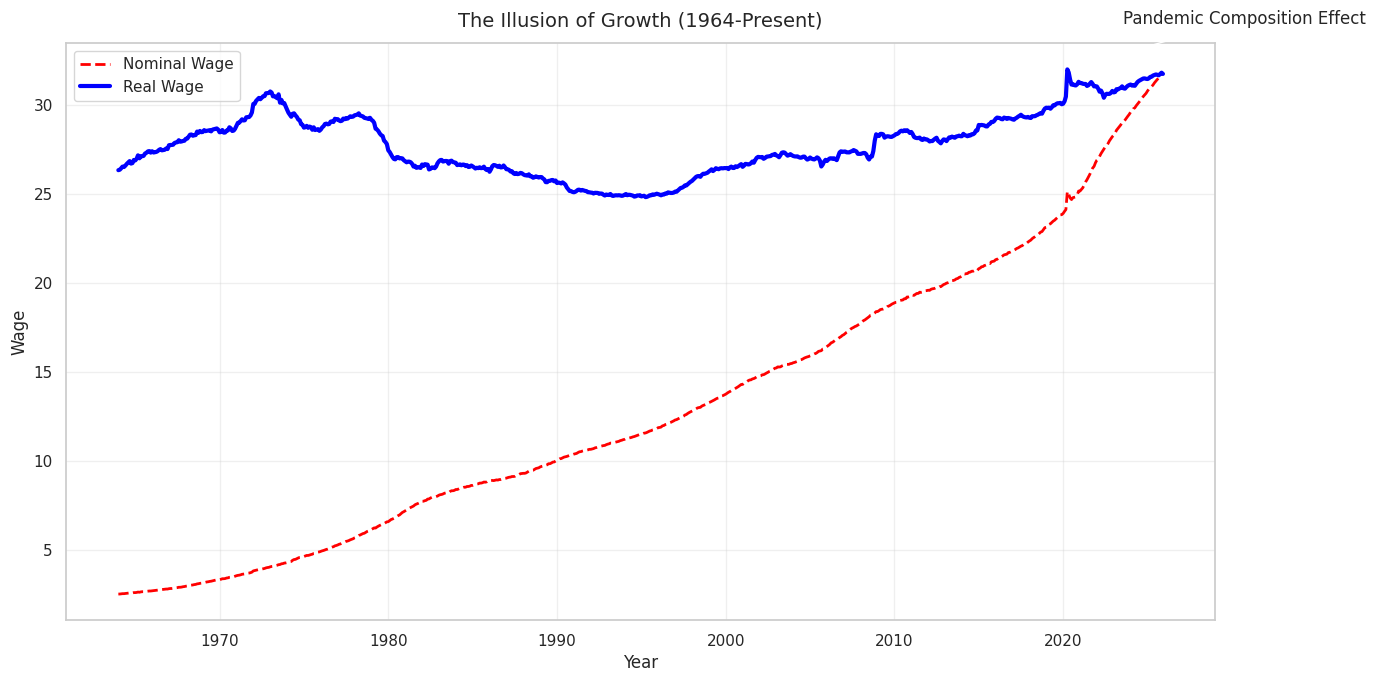

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Safety check: make sure index is datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

plt.figure(figsize=(14, 7))

# 1. Nominal Wage: dashed red line
plt.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage"
)

# 2. Real Wage: solid blue line
plt.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage"
)

# 3. Title
plt.title("The Illusion of Growth (1964-Present)", fontsize=14, pad=12)

plt.xlabel("Year")
plt.ylabel("Wage")
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Annotate the 2020 spike
df_2020 = df.loc["2020-01-01":"2020-12-31"]

if len(df_2020) > 0:
    spike_date = df_2020["Real_Wage"].idxmax()
    spike_value = df_2020.loc[spike_date, "Real_Wage"]

    plt.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(40, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
        ha="left",
        va="bottom"
    )

plt.tight_layout()
plt.show()

Fetching ECIWAG from FRED...


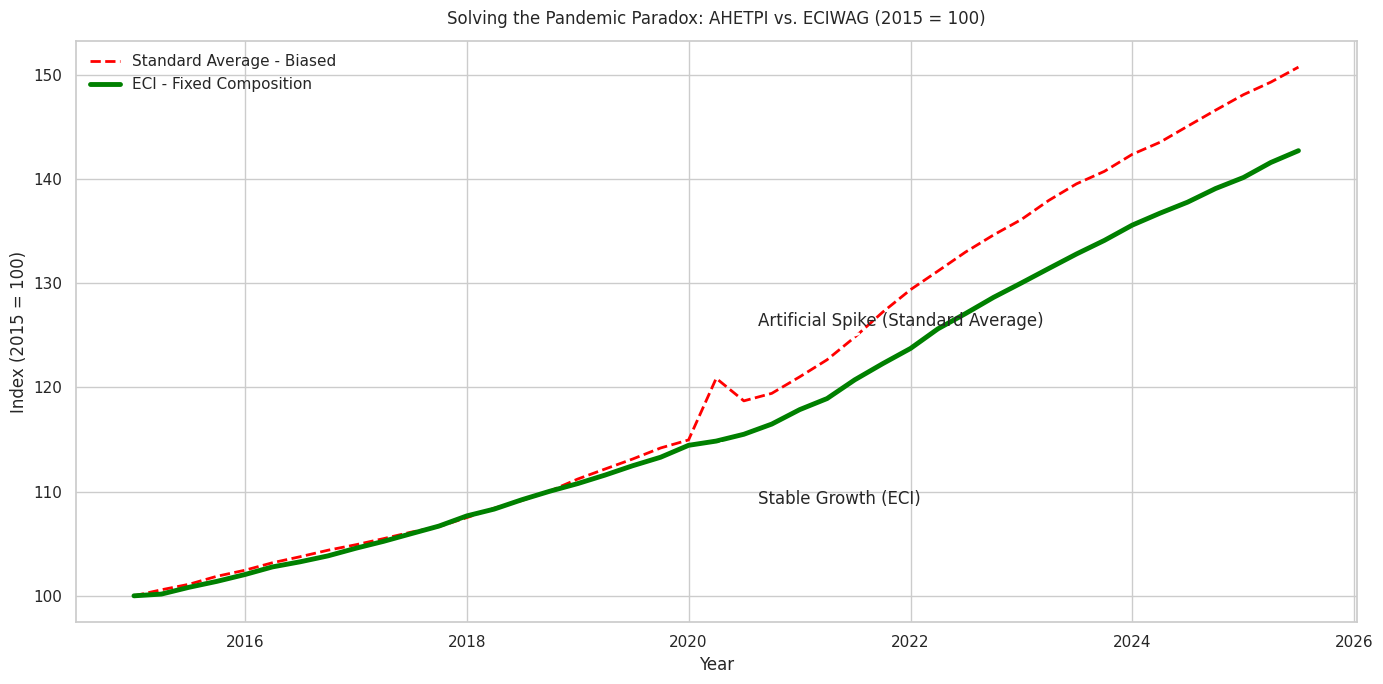

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Fetch the corrective dataset: ECIWAG
print("Fetching ECIWAG from FRED...")
eci = fred.get_series("ECIWAG")

# 2) Filter both series from 2015-01-01 onwards
start_date = "2015-01-01"
wages_2015 = wages[wages.index >= start_date].dropna()
eci_2015 = eci[eci.index >= start_date].dropna()

# Make sure both are datetime-indexed (usually already true)
if not isinstance(wages_2015.index, pd.DatetimeIndex):
    wages_2015.index = pd.to_datetime(wages_2015.index)
if not isinstance(eci_2015.index, pd.DatetimeIndex):
    eci_2015.index = pd.to_datetime(eci_2015.index)

# 3) Rebase both to 100 (first value = 100)
wages_rebased = (wages_2015 / wages_2015.iloc[0]) * 100
eci_rebased = (eci_2015 / eci_2015.iloc[0]) * 100

# Optional: align dates if you want cleaner overlay (keeps only shared dates)
aligned = pd.concat([wages_rebased.rename("wages"), eci_rebased.rename("eci")], axis=1).dropna()

# 4) Plot on the same chart with requested styles
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(
    aligned.index, aligned["wages"],
    linestyle="--", color="red", linewidth=2,
    label="Standard Average - Biased"
)

ax.plot(
    aligned.index, aligned["eci"],
    linestyle="-", color="green", linewidth=3.5,
    label="ECI - Fixed Composition"
)

ax.set_title("Solving the Pandemic Paradox: AHETPI vs. ECIWAG (2015 = 100)", pad=12)
ax.set_xlabel("Year")
ax.set_ylabel("Index (2015 = 100)")
ax.legend(frameon=False)

# 5) Annotate divergence in 2020
df_2020 = aligned.loc["2020-01-01":"2020-12-31"]
if len(df_2020) > 0:
    spike_date = df_2020["wages"].idxmax()
    spike_w = df_2020.loc[spike_date, "wages"]
    spike_eci = df_2020.loc[spike_date, "eci"]

    ax.annotate(
        "Artificial Spike (Standard Average)",
        xy=(spike_date, spike_w),
        xytext=(30, 35),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", linewidth=2),
        ha="left", va="bottom"
    )

    ax.annotate(
        "Stable Growth (ECI)",
        xy=(spike_date, spike_eci),
        xytext=(30, -35),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", linewidth=2),
        ha="left", va="top"
    )
else:
    print("No 2020 data found after filtering; annotation skipped.")

fig.tight_layout()
plt.show()